# Logistic Regression _diabetes

In [22]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix , roc_curve
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score

import warnings 
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("diabetes.csv")
df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,50,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,52,1
3,150,66,23,94,28.1,0.167,21,0
4,150,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,63,0
764,122,70,27,0,36.8,0.340,27,0
765,121,72,23,112,26.2,0.245,30,0
766,126,60,0,0,30.1,0.349,47,1


In [3]:
df.describe()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,121.117188,69.076823,20.536458,79.799479,31.992578,0.471876,33.243490,0.348958
std,31.805091,19.367794,15.952218,115.244002,7.884160,0.331329,11.758182,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,142.000000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   768 non-null    int64  
 1   BloodPressure             768 non-null    int64  
 2   SkinThickness             768 non-null    int64  
 3   Insulin                   768 non-null    int64  
 4   BMI                       768 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


In [5]:
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

<AxesSubplot:xlabel='Outcome', ylabel='count'>

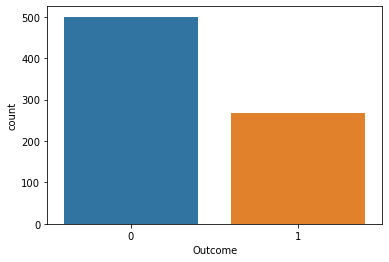

In [6]:
sns.countplot(x=df["Outcome"])

# Train Test Split

In [7]:
x = df.drop("Outcome",axis =1)
y = df["Outcome"]

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25 ,random_state=11, stratify=y)

In [8]:
x_train

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
359,196,76,36,249,36.5,0.875,29
454,100,54,28,105,37.8,0.498,24
110,171,72,33,135,33.3,0.199,24
349,0,80,32,0,41.0,0.346,37
221,158,90,0,0,31.6,0.805,66
...,...,...,...,...,...,...,...
599,109,38,18,120,23.1,0.407,26
147,106,64,35,119,30.5,1.400,34
637,94,76,18,66,31.6,0.649,23
265,96,74,18,67,33.6,0.997,43


In [9]:
500 / (500+268)

0.6510416666666666

In [10]:
y_train.value_counts()

0    375
1    201
Name: Outcome, dtype: int64

In [11]:
375 /(375+201)

0.6510416666666666

# Model training

In [12]:
logistic_model = LogisticRegression()
logistic_model.fit(x_train,y_train)

LogisticRegression()

# Evaluation

In [13]:
y_pred = logistic_model.predict(x_test)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0], dtype=int64)

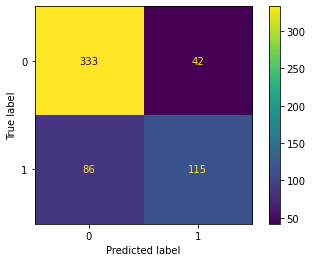

In [23]:
plot_confusion_matrix(logistic_model,x_train,y_train)

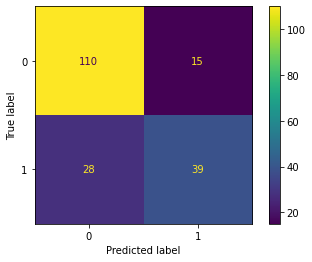

In [24]:
plot_confusion_matrix(logistic_model,x_test,y_test)

In [14]:
cnf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n",cnf_matrix)

print("*"*80)
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)

print("*"*80)
clf_report= classification_report(y_test,y_pred)
print("classification_report:\n",clf_report)

Confusion Matrix:
 [[110  15]
 [ 28  39]]
********************************************************************************
Accuracy: 0.7760416666666666
********************************************************************************
classification_report:
               precision    recall  f1-score   support

           0       0.80      0.88      0.84       125
           1       0.72      0.58      0.64        67

    accuracy                           0.78       192
   macro avg       0.76      0.73      0.74       192
weighted avg       0.77      0.78      0.77       192



In [15]:
y_pred_train = logistic_model.predict(x_train)

cnf_matrix = confusion_matrix(y_train,y_pred_train)
print("Confusion Matrix:\n",cnf_matrix)

print("*"*80)
accuracy = accuracy_score(y_train,y_pred_train)
print("Accuracy:",accuracy)

print("*"*80)
clf_report= classification_report(y_train,y_pred_train)
print("classification_report:\n",clf_report)

Confusion Matrix:
 [[333  42]
 [ 86 115]]
********************************************************************************
Accuracy: 0.7777777777777778
********************************************************************************
classification_report:
               precision    recall  f1-score   support

           0       0.79      0.89      0.84       375
           1       0.73      0.57      0.64       201

    accuracy                           0.78       576
   macro avg       0.76      0.73      0.74       576
weighted avg       0.77      0.78      0.77       576



In [16]:
201/(375+201)

0.3489583333333333

In [17]:
0.79 * 0.65 + 0.73*0.35

0.7690000000000001

In [ ]:
Predicted values
[333  42]   Actual values
[ 86 115]   Actual values

TN = 333
TP = 115
FP = 42
FN = 86

In [18]:
#precision = TP/(TP+FP)

Precision = 115/(115+42)
Precision

0.732484076433121

In [19]:
#precision = TN/(TN+FN)

Precision = 333/(333+86)
Precision

0.7947494033412887

In [25]:
y_pred = logistic_model.predict(x_test)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0], dtype=int64)

In [29]:
y_pred_prob = logistic_model.predict_proba(x_train)


In [30]:
y_pred_prob[:,1]

array([0.90237277, 0.24503761, 0.60563067, 0.01201601, 0.78772023,
       0.24093424, 0.31505838, 0.14092552, 0.87007733, 0.29215521,
       0.13072803, 0.31994933, 0.21465224, 0.82183529, 0.20996879,
       0.83508716, 0.08929196, 0.30624857, 0.30083671, 0.03222296,
       0.13400477, 0.29798821, 0.3265594 , 0.51637549, 0.2034    ,
       0.64888749, 0.82325658, 0.25860422, 0.2200486 , 0.79757726,
       0.49039095, 0.00479607, 0.42093176, 0.48483888, 0.6432483 ,
       0.11408722, 0.10482519, 0.49175316, 0.37978984, 0.30339145,
       0.64792492, 0.22848113, 0.47296521, 0.05143414, 0.71273585,
       0.09136447, 0.50833887, 0.72587151, 0.09339536, 0.12103674,
       0.39301109, 0.1229471 , 0.83201554, 0.65549434, 0.25448292,
       0.6713053 , 0.79901745, 0.07182243, 0.22435176, 0.11048221,
       0.16528716, 0.23235301, 0.19865193, 0.52841916, 0.29641141,
       0.24435356, 0.03325502, 0.26079205, 0.32517199, 0.88088483,
       0.18485717, 0.42826073, 0.11271926, 0.6209088 , 0.59461

In [31]:
fpr,tpr,thresh = roc_curve(y_train,y_pred_prob[:,1])

In [32]:
fpr

array([0.        , 0.        , 0.00266667, 0.00266667, 0.00533333,
       0.00533333, 0.008     , 0.008     , 0.01066667, 0.01066667,
       0.01333333, 0.01333333, 0.016     , 0.016     , 0.02133333,
       0.02133333, 0.024     , 0.024     , 0.02666667, 0.02666667,
       0.02933333, 0.02933333, 0.032     , 0.032     , 0.03466667,
       0.03466667, 0.04      , 0.04      , 0.04533333, 0.04533333,
       0.05333333, 0.05333333, 0.05866667, 0.05866667, 0.064     ,
       0.064     , 0.06666667, 0.06666667, 0.06933333, 0.06933333,
       0.07733333, 0.07733333, 0.08266667, 0.08266667, 0.08533333,
       0.08533333, 0.088     , 0.088     , 0.09066667, 0.09066667,
       0.096     , 0.096     , 0.104     , 0.104     , 0.10933333,
       0.10933333, 0.112     , 0.112     , 0.11466667, 0.11466667,
       0.11733333, 0.11733333, 0.12266667, 0.12266667, 0.13066667,
       0.13066667, 0.13866667, 0.13866667, 0.14666667, 0.14666667,
       0.152     , 0.152     , 0.17066667, 0.17066667, 0.176  

In [33]:
tpr

array([0.        , 0.00497512, 0.00497512, 0.02487562, 0.02487562,
       0.06467662, 0.06467662, 0.07960199, 0.07960199, 0.13432836,
       0.13432836, 0.16915423, 0.16915423, 0.17412935, 0.17412935,
       0.25373134, 0.25373134, 0.25870647, 0.25870647, 0.26865672,
       0.26865672, 0.30348259, 0.30348259, 0.30845771, 0.30845771,
       0.31343284, 0.31343284, 0.31840796, 0.31840796, 0.32338308,
       0.32338308, 0.34328358, 0.34328358, 0.35820896, 0.35820896,
       0.37810945, 0.37810945, 0.39303483, 0.39303483, 0.42288557,
       0.42288557, 0.43283582, 0.43283582, 0.43781095, 0.43781095,
       0.44776119, 0.44776119, 0.45771144, 0.45771144, 0.46766169,
       0.46766169, 0.51243781, 0.51243781, 0.51741294, 0.51741294,
       0.56716418, 0.56716418, 0.5721393 , 0.5721393 , 0.57711443,
       0.57711443, 0.58706468, 0.58706468, 0.60696517, 0.60696517,
       0.62189055, 0.62189055, 0.64179104, 0.64179104, 0.64676617,
       0.64676617, 0.65174129, 0.65174129, 0.66666667, 0.66666

In [34]:
thresh

array([1.96417993, 0.96417993, 0.96336848, 0.94492621, 0.94439972,
       0.88578619, 0.88559035, 0.87771198, 0.87770558, 0.83508716,
       0.83310376, 0.82183529, 0.81334843, 0.8124765 , 0.8071147 ,
       0.7772148 , 0.77194077, 0.7698462 , 0.76877662, 0.75833326,
       0.75761255, 0.72587151, 0.72312019, 0.72077485, 0.72012117,
       0.72001738, 0.71761249, 0.71273585, 0.70556722, 0.70113511,
       0.69525401, 0.6792286 , 0.6749774 , 0.6713053 , 0.66399262,
       0.6556974 , 0.65549434, 0.6499874 , 0.64888749, 0.62624034,
       0.62099454, 0.6198668 , 0.60589046, 0.60563067, 0.60358548,
       0.60125113, 0.59985783, 0.59461511, 0.59220819, 0.5883011 ,
       0.58028093, 0.55287489, 0.54478675, 0.54452758, 0.53423359,
       0.51444488, 0.51086333, 0.50833887, 0.49453042, 0.49175316,
       0.49039095, 0.48483888, 0.47832571, 0.46931107, 0.45390767,
       0.44974073, 0.44735382, 0.44334698, 0.43035217, 0.42954635,
       0.42826073, 0.42508867, 0.40991199, 0.40336291, 0.40174

Text(0.5, 1.0, 'Receiver Operating Charaacteristics Curve')

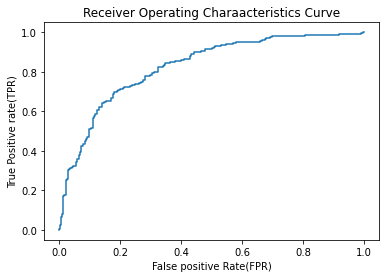

In [37]:
plt.plot(fpr,tpr)
plt.xlabel("False positive Rate(FPR)")
plt.ylabel("True Positive rate(TPR)")
plt.title("Receiver Operating Charaacteristics Curve")

In [40]:
np.where(thresh >= 0.49)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60], dtype=int64),)